<div dir="rtl" style="text-align: right;">
    
# بخش یک : تحلیل اولیه دیت





<div dir="rtl" style="text-align: right;">

## رویکرد


<div dir="rtl" style="text-align: right;">
علارغم تجربه قبلی در کارکردن با دیتاست های مختلف در حیطه های گوناگون (نظیر دیتاست های مکانی-زمانی از قبیل قرائت کنتورهای استان تهران یا ماتریس های سه بعدی سری زمانی فرونشست) در محیط پایتون، دیتاست مالی برای من تجربه جدیدی بود. به همین دلیل پیش از پاسخ به سوالات این مرحله، نیاز به کاوش و شناخت دیتاست و اصطلاحاً "سوار شدن" بر دیتاست داشتم. برای رسیدن به این هدف چهار گام را تعریف کردم تا لایه به لایه و از سطح به عمق، دیتا را کاوش کنم و آن را بشناسم. برای هر گام، مختصری از دلیل انجام آن گام خواهم نوشت و پس از اجرای کد مربوط به آن، insight خودم در مورد خروجیِ آن مرحله خواهم نوشت.


<div dir="rtl" style="text-align: right;">

### گام اول: بررسی اولیه کمی و کیفی  دیتاست





<div dir="rtl" style="text-align: right;">
در این گام، ویژگی های کلی دیتاست نظیر dimention و وجود دمقادیر گم شده یا ریکورد های تکراری را بررسی خواهیم کرد.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('MasterClass-FinTech01-Data.csv')  
df. head()


,monthly_income,avg_monthly_spend,credit_limit,num_transactions,account_tenure_months,cash_withdraw_ratio,late_payment_count,age,region_risk_score,marketing_score,app_login_count,employment_type,debt_to_income,payment_delay_ratio,repayment_issue
0,26867.849400,18963.331725,13797.840243,31,114,0.236576,2,60,0.106796,59.591421,24,self_employed,0.705800,0.062500,1
1,20841.350135,10425.045672,19907.767202,36,64,0.028460,0,20,0.086290,63.392608,16,other,0.500210,0.000000,1
2,28540.385984,9244.744459,23277.396544,45,50,0.330158,0,24,0.438799,62.237803,31,other,0.323918,0.000000,1
3,40506.265408,13339.455402,52088.041939,44,12,0.000000,3,60,0.290462,53.793908,20,self_employed,0.329318,0.066667,1
4,20057.103316,12374.793741,32688.989694,34,107,0.414542,2,39,0.238047,56.238840,12,salaried,0.616978,0.057143,1


In [4]:
df.shape  # rows and columns
df.info()  # data types and non-null counts
df.columns  # all column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   monthly_income         1389 non-null   float64
 1   avg_monthly_spend      1500 non-null   float64
 2   credit_limit           1500 non-null   float64
 3   num_transactions       1500 non-null   int64  
 4   account_tenure_months  1500 non-null   int64  
 5   cash_withdraw_ratio    1500 non-null   float64
 6   late_payment_count     1500 non-null   int64  
 7   age                    1500 non-null   int64  
 8   region_risk_score      1500 non-null   float64
 9   marketing_score        1500 non-null   float64
 10  app_login_count        1500 non-null   int64  
 11  employment_type        1391 non-null   object 
 12  debt_to_income         1500 non-null   float64
 13  payment_delay_ratio    1500 non-null   float64
 14  repayment_issue        1500 non-null   int64  
dtypes: f

Index(['monthly_income', 'avg_monthly_spend', 'credit_limit',
       'num_transactions', 'account_tenure_months', 'cash_withdraw_ratio',
       'late_payment_count', 'age', 'region_risk_score', 'marketing_score',
       'app_login_count', 'employment_type', 'debt_to_income',
       'payment_delay_ratio', 'repayment_issue'],
      dtype='object')

In [5]:
# Count missing values
df.isnull().sum()

# Percentage of missing values
(df.isnull().sum() / len(df) * 100).round(2)

monthly_income           7.40
avg_monthly_spend        0.00
credit_limit             0.00
num_transactions         0.00
account_tenure_months    0.00
cash_withdraw_ratio      0.00
late_payment_count       0.00
age                      0.00
region_risk_score        0.00
marketing_score          0.00
app_login_count          0.00
employment_type          7.27
debt_to_income           0.00
payment_delay_ratio      0.00
repayment_issue          0.00
dtype: float64

In [6]:
# Look for empty strings that should be NaN
df. replace('', np.nan, inplace=True)
df.isnull().sum()

monthly_income           111
avg_monthly_spend          0
credit_limit               0
num_transactions           0
account_tenure_months      0
cash_withdraw_ratio        0
late_payment_count         0
age                        0
region_risk_score          0
marketing_score            0
app_login_count            0
employment_type          109
debt_to_income             0
payment_delay_ratio        0
repayment_issue            0
dtype: int64


<div dir="rtl" style="text-align: right;">
    
#### برداشت ها


 >- دو ستون درامد ماهانه `monthly_income` و نوع استخدامحدود `employment_type` حدود **7 درصد** داده ی گم شده دارد


<div dir="rtl" style="text-align: right;">

### گام دوم : شناخت متغیر هدف

<div dir="rtl" style="text-align: right;">
در این بخش، هدف اصلی ما این است که آیا این متغییر به صورت imbalance در دیتاست ما وجود دارد یا خیر. پاسخ به این سوال، تاثیر مهمی در انتخاب روش مدل سازی ما دارد. چرا که اگر  داده بالانس نباشد و ما آن را در نظر نگرفته باشیم، مدل دچار بایاس شده و به سمت ناصحیحی سوگیری خواهد داشت.


In [ ]:
# Count target variable
df['repayment_issue'].value_counts()

# Percentage distribution
df['repayment_issue'].value_counts(normalize=True) * 100

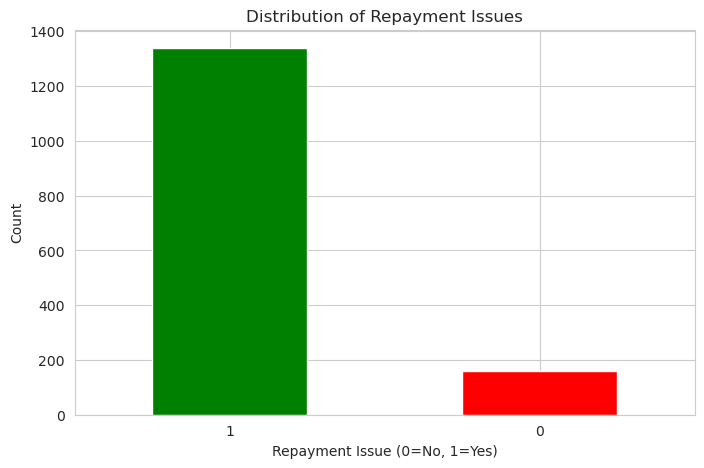

In [74]:
plt.figure(figsize=(8, 5))
df['repayment_issue'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Repayment Issues')
plt.xlabel('Repayment Issue (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



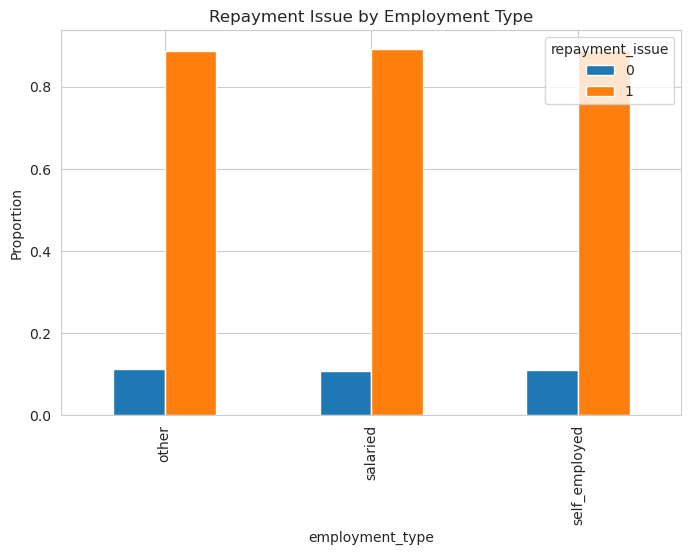

In [73]:
# Employment type vs repayment issue
pd. crosstab(df['employment_type'], df['repayment_issue'], normalize='index').plot(
    kind='bar', 
    figsize=(8, 5)  # Add this line (width, height)
)
plt.title('Repayment Issue by Employment Type')
plt.ylabel('Proportion')
plt.show()

<div dir="rtl" style="text-align: right;">
    
#### برداشت ها
>- متغیر هدف، به شدت imbalance است !
>- این موضوع میتواند باعث شود مدل آینده ی ما، به طور ناصحیحی 90 درصد افراد را فاقد صلاحیت دانسته و مشتریان خوش حساب را نیز به صورت اشتتباه در کتگوری مشکل دار ها قرار دهد.
>  گروه های شغلی، به صورت بالانس و متعادل در دیتاست وجود دارد و از این بابت خیال مان راحت است.


<div dir="rtl" style="text-align: right;">


### گام سوم : پیدا کردن متغییر هایی که با کمک آن، ریسک را تشخیص می توان داد

<div dir="rtl" style="text-align: right;">
بر اساس مطالعات و سرچ ها و در نهایت جمع بندی و اندکی تآمل در متغیر ها و استفاده از منطق شخصی، متغیر هایی که به نظر خودم، میتوانند تاثیر بیشتری در پرداخت یا عدم پرداخت وجه دریافیِ مشتری شوند را، بر اساس زیر، دسته بندی کردم و کامنت های ذهنی و منطقی ام را برای هر متغیر ذکر کردم. 


 <div dir="rtl" style="text-align: right;">   
<strong> الف)  متغیر های مربوط به توانایی مالی مشتری<strong/> 
    
    monthly_income : درامد ماهانه اش چقدر است ؟
    debt_to_income : نسبت بدهی به درامدش چقدر است ؟
    avg_monthly_spend : ماهی جقدر خرج می کند؟
    credit_limit : اعتبار در دسترس مشتری، چه میزان است ؟
    


 <div dir="rtl" style="text-align: right;">   
<strong> ب) رفتار مالی مشتری <strong/> 
    
    late_payment_count : چند بار دیر پرداخت کرده (بدحساب) ؟
    payment_delay_ratio : تاخیر در پرداخت ( بدحساب) ؟
    cash_withdraw_ratio : میزان نقد کردن اعتبار ( شاید مشکل مالی پیش آمده براش)


 <div dir="rtl" style="text-align: right;">   
<strong> ج) متغیر های مربوط به ویژگی های شخصی و پروفایل مشتری<strong/>    
    
    age : سن (آیا سن بالاتر، ریسک بازپرداخت را ممکن است زیاد کند ؟
    employment_type : شغل ( آیا شغل ش درامد پایداری به او می دهد؟)
    account_tenure_months : مشتری قدیمی است یا جدید ؟ ( مشتری قدیمی شاید بتواند ریسک را کمتر کند چون رفتارش را میدانیم)
    credit_limit : اعتبار در دسترس مشتری، چه میزان است ؟
    


 <div dir="rtl" style="text-align: right;">   
<strong> د) متغیر های مربوط به فعالیت مشتری در سامانه ما<strong/>    
    
    app_login_count : آیا کاربرانی که بیشتر لاگین کردن توی سامانه، پرداختی هایشان بهتر انجام شده(خوش حساب بودند)؟
    num_transactions : فعالیت کاربر چه تاثیری در پرداخت دارد؟
    

 <div dir="rtl" style="text-align: right;">  
     
##### برای بررسی متغیر ها و رابطه آن ها با هم دیگر ( همبستگی میان متغیر های مستقل) و بررسی رابطه آن ها با متغیر هدف ( همبستگی متغیر ها با متغیر وابسته) از هیت مپ استفاده میکنیم تا بتوانیم با سرعت یک قضاوت کلی روی داده داشته باشیم.

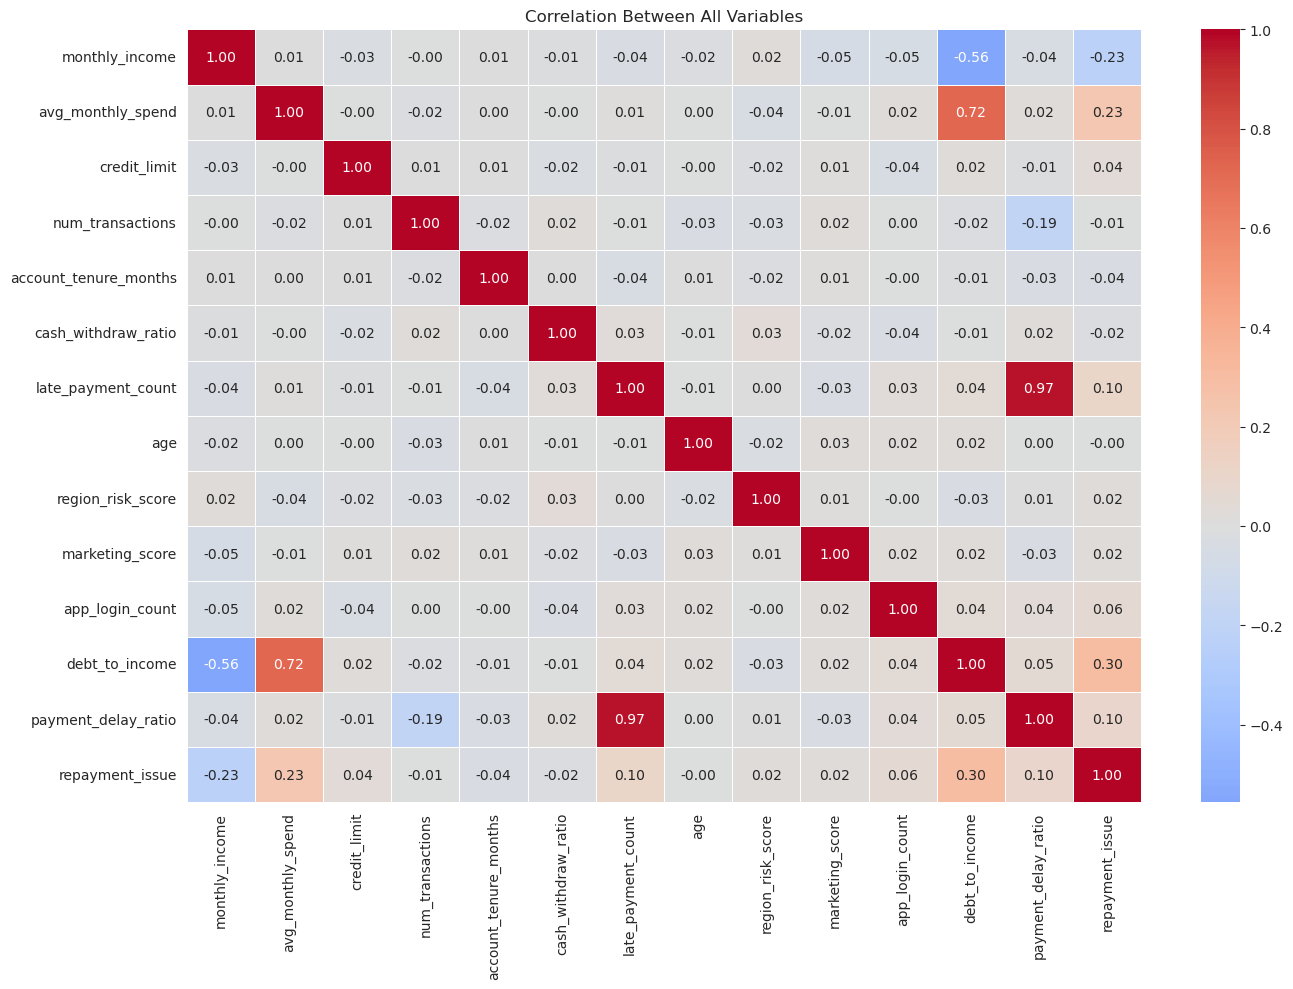

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    df_numeric.corr(), 
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Between All Variables')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')  # Save for your report!
plt. show()

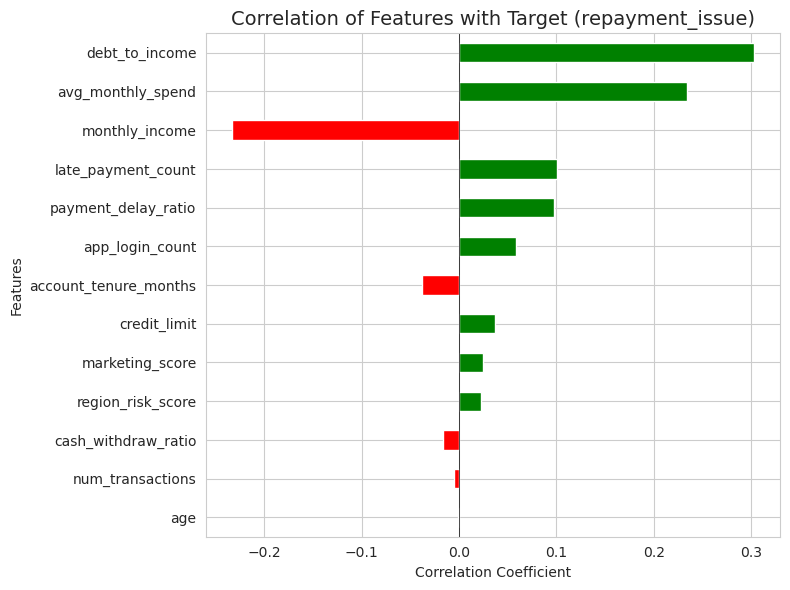

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get correlation with target only
target_correlation = df_numeric.corr()['repayment_issue'].drop('repayment_issue')

# Sort by absolute value (strongest first)
target_correlation = target_correlation.sort_values(key=abs, ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(8, 6))
colors = ['green' if x > 0 else 'red' for x in target_correlation]
target_correlation.plot(kind='barh', color=colors)

plt.title('Correlation of Features with Target (repayment_issue)', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('target_correlation.png')
plt. show()

<div dir="rtl" style="text-align: right;">

#### برداشت ها

#### **همبستگی میان متغیر های مستقل** :
>- دو متغیر `late_payment_count` و `payment_delay_ratio` میزان همبستگی تقریبا برابر با **1** دارند، بنابرین عملا انگار دارند یک چیزِ واحد را اندازه میگیرند. پس در مدل سازی آتی، میتوان یکی از آن دو را کنار گذاشت
>- دو متغیر `avg_monthly_spend` و `debt_to_income` همانطور که منطق حکم میکرد، همبستگی بالایی دارند ( حدود **0.7**) چراکه هرچی مشتری بیشتر خرج کند، احتمال افزایش نسبت بدهی به درامدش بالاتر خواهد رفت.
>- مورد جالب توجه این است که بین متغیر `monthly_income و debt_to_income` همبستگی معکوس وجود دارد. که البته این مورد نیز منطقی به نظر میرسد چرا که هرچه درامد مشتری بالاتر رود، نسبت بدهی به درامد آن کمتر خواهد شد.

#### **همبستگی متغیرهای مستقل با متغیر وابسته** :
>- سه متغیر `debt_to_income - avg_monthly_spend - monthly_income` بین حدود **0.3 تا 0.2** همبستگی با متغیر هدف ما نشان داند. این مورد از این حیث مهم است که می توان به کمک آن، تا حدی پیشبینی کرد که متغیر وابسته چه خواهد بود.


 <div dir="rtl" style="text-align: right;">  

### گام چهارم : بررسی برخی از الگو های مشکوک و موارد خاص در دیتاست

In [104]:
df[df['debt_to_income'] > 1.5] 

,monthly_income,avg_monthly_spend,credit_limit,num_transactions,account_tenure_months,cash_withdraw_ratio,late_payment_count,age,region_risk_score,marketing_score,app_login_count,employment_type,debt_to_income,payment_delay_ratio,repayment_issue,dti_group,dti_category,has_late_payments
16,14689.196225,26398.233776,15807.327441,44,48,0.044773,0,35,0.384546,27.178369,25,self_employed,1.797119,0.000000,1,Extreme (>1.5),Extreme,0
19,NaN,30771.421192,32633.977526,26,23,0.107547,1,62,0.023244,44.307811,24,salaried,2.000000,0.037037,1,Extreme (>1.5),Extreme,1
26,NaN,31196.582660,28757.341251,31,69,0.084237,1,52,0.043259,36.476518,18,salaried,2.000000,0.031250,1,Extreme (>1.5),Extreme,1
49,10881.114359,23204.928043,40906.179690,32,39,0.502770,0,53,0.070102,49.914157,19,salaried,2.000000,0.000000,1,Extreme (>1.5),Extreme,0
74,7724.110568,16479.846549,20815.193413,39,84,0.073613,2,66,0.349356,48.961709,29,other,2.000000,0.050000,1,Extreme (>1.5),Extreme,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,12190.782014,22717.170876,33090.607280,38,15,0.324625,3,61,0.370544,63.985629,17,salaried,1.863471,0.076923,1,Extreme (>1.5),Extreme,1
1369,15461.045011,23226.316022,29089.855745,37,99,0.313919,1,30,0.071734,46.784166,17,salaried,1.502247,0.026316,1,Extreme (>1.5),Extreme,1
1395,23715.215429,78182.957492,16728.495490,34,41,0.000000,0,28,0.110703,69.574103,13,self_employed,2.000000,0.000000,1,Extreme (>1.5),Extreme,0
1397,NaN,29030.825491,19197.396983,49,53,0.186496,0,22,0.211133,33.958964,25,self_employed,1.944022,0.000000,1,Extreme (>1.5),Extreme,0


 <div dir="rtl" style="text-align: right;">
     
     **مورد جالب: مشتریانی هستند که بیش از درامد شان، خرج کرده اند**

In [105]:
# Let's check:  Do ALL of them default?
extreme_dti = df[df['debt_to_income'] > 1.5]

print(f"Total customers with DTI > 1.5: {len(extreme_dti)}")
print(f"How many has payment issu?  {extreme_dti['repayment_issue'].sum()}")
print(f"issue rate: {extreme_dti['repayment_issue'].mean() * 100:.1f}%")

Total customers with DTI > 1.5: 84
How many has payment issu?  84
issue rate: 100.0%


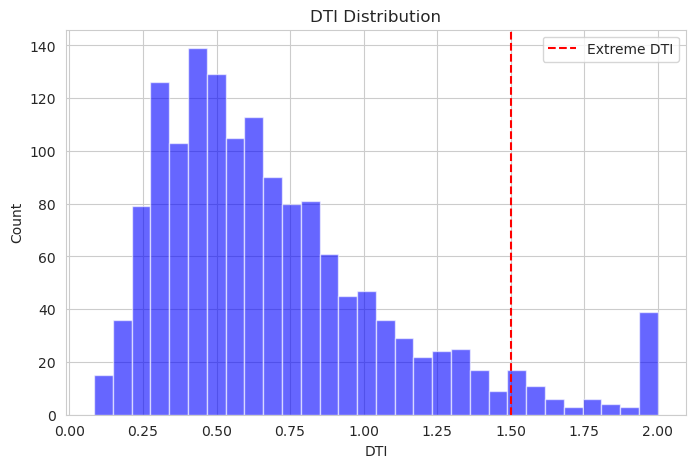

In [66]:
plt.figure(figsize=(8, 5))
plt.hist(df['debt_to_income'], bins=30, color='blue', alpha=0.6)
plt.axvline(1.5, color='red', linestyle='--', label='Extreme DTI')
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('DTI Distribution')
plt.legend()
plt.show()

In [93]:
# Categorize by DTI
df['dti_category'] = pd.cut(df['debt_to_income'], 
                             bins=[0, 0.6, 0.8, 1.0, 1.5, 3.0],
                             labels=['Low', 'Moderate', 'High', 'Very High', 'Extreme'])

# Check it
print(df['dti_category'].value_counts().sort_index())

dti_category
Low          743
Moderate     293
High         187
Very High    193
Extreme       84
Name: count, dtype: int64


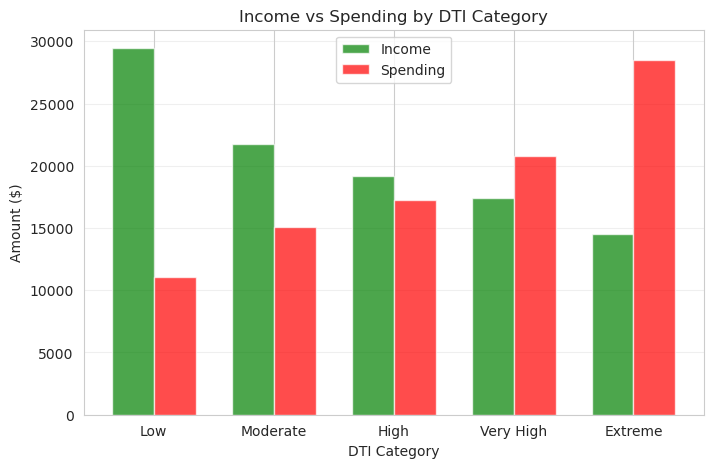

In [98]:
# Chart Income vs Spending
plt.figure(figsize=(8, 5))

income_avg = df. groupby('dti_category')['monthly_income'].mean()
spending_avg = df.groupby('dti_category')['avg_monthly_spend'].mean()

x = range(len(income_avg))
width = 0.35

plt.bar([i - width/2 for i in x], income_avg, width, label='Income', color='green', alpha=0.7)
plt.bar([i + width/2 for i in x], spending_avg, width, label='Spending', color='red', alpha=0.7)

plt.xlabel('DTI Category')
plt.ylabel('Amount ($)')
plt.title('Income vs Spending by DTI Category')
plt.xticks(x, income_avg.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

<div dir="rtl" style="text-align: right;">

### برداشت ها
>- در بین 1500 ریکورد، 84 ریکورد بیش از **1.5** برابر درآمد شان، خرج کرده بودند.
>- بررسی بیشتر نشان داد که **تمامی** این افراد، دچار مشکل در پداخت شده بودند و بع عبارت دیگر، **متغیر هدف** برای آن ها برابر با **1** بود
>- در نتیجه، میتوانیم این شاخص را در نظر بگیریم که اگر `DTI => 1.5` باشد، قطعا مشتری مشکل پرداخت خواهد داشت
>- نکته جالب توجه دیگر آن که، مشتریانی `DTI` در آن ها پایین تر است، **درامد سرانه** بالاتری نیز دارند.

<div dir="rtl" style="text-align: right;">

 ##  پاسخ به سوالات بخش 1

<div dir="rtl" style="text-align: right;">

### سوال 1 : ‫به‬ ‫نظر‬‫شما‬ ‫کدام‬ ‫متغیرها‬ ‫می‬ ‫توانند‬‫بیشترین‬ ‫ارتباط‬ ‫را‬ ‫با‬ ‫متغیر‬ ‫هدف‬ ‫داشته‬ ‫باشند؟‬ ‫چرا؟‬ 


<div dir="rtl" style="text-align: right;">
    
### پاسخ 1    

با توجه به بررسی هم بستگی میان متغیر ها ( هم به صورت بررسی همبستگی میان متغیر های مستقل و هم با متغیر وابسته) و جمع بندی گام سوم از بخش یک، تصمیم گرفتم این متغییر هارا انتخاب کنم. تحلیل کامل تر و چارت های ترسیم شده، در قسمت فوق قرار داده شده اند

`debt_to_income`
`monthly_income`
`avg_monthly_spend`
`late_payment_count`
`payment_delay_ratio`
`Cash_withdraw_ratio`




<div dir="rtl" style="text-align: right;">

#### برداشت ها

#### **همبستگی میان متغیر های مستقل** :
>- دو متغیر `late_payment_count` و `payment_delay_ratio` میزان همبستگی تقریبا برابر با **1** دارند، بنابرین عملا انگار دارند یک چیزِ واحد را اندازه میگیرند. پس در مدل سازی آتی، میتوان یکی از آن دو را کنار گذاشت
>- دو متغیر `avg_monthly_spend` و `debt_to_income` همانطور که منطق حکم میکرد، همبستگی بالایی دارند ( حدود **0.7**) چراکه هرچی مشتری بیشتر خرج کند، احتمال افزایش نسبت بدهی به درامدش بالاتر خواهد رفت.
>- مورد جالب توجه این است که بین متغیر `monthly_income و debt_to_income` همبستگی معکوس وجود دارد. که البته این مورد نیز منطقی به نظر میرسد چرا که هرچه درامد مشتری بالاتر رود، نسبت بدهی به درامد آن کمتر خواهد شد.

#### **همبستگی متغیرهای مستقل با متغیر وابسته** :
>- سه متغیر `debt_to_income - avg_monthly_spend - monthly_income` بین حدود **0.3 تا 0.2** همبستگی با متغیر هدف ما نشان داند. این مورد از این حیث مهم است که می توان به کمک آن، تا حدی پیشبینی کرد که متغیر وابسته چه خواهد بود.


<div dir="rtl" style="text-align: right;">

### سوال 2 : ‫آیا‬ ‫داده‬ ‫شامل‬ ‫موارد‬ ‫گمشده‪،‬‬ ‫توزیع‬ ‫های‬‫ نامتوازن‬ ‫یا‬ ‫الگوهای‬ ‫غیرعادی‬ ‫است؟‬

<div dir="rtl" style="text-align: right;">

### پاسخ 2
>- در بین 1500 ریکورد، **84** ریکورد بیش از **1.5** برابر درآمد شان، خرج کرده بودند.
>- بررسی بیشتر نشان داد که **تمامی** این افراد، دچار مشکل در پداخت شده بودند و بع عبارت دیگر، **متغیر هدف** برای آن ها برابر با **1** بود
>- در نتیجه، میتوانیم این شاخص را در نظر بگیریم که اگر `DTI => 1.5` باشد، قطعا مشتری مشکل پرداخت خواهد داشت
>- نکته جالب توجه دیگر آن که، مشتریانی `DTI` در آن ها پایین تر است، **درامد سرانه** بالاتری نیز دارند.

>- متغیر هدف `payment_issue`، به شدت **imbalance** است !
>- این موضوع میتواند باعث شود مدل آینده ی ما، به طور ناصحیحی **90 درصد** افراد را فاقد صلاحیت دانسته و **مشتریان خوش حساب** را نیز به صورت اشتتباه در کتگوری مشکل دار ها قرار دهد.
>  گروه های شغلی، به صورت **بالانس** و متعادل در دیتاست وجود دارد و از این بابت خیال مان راحت است.



<div dir="rtl" style="text-align: right;">

### سوال 3 ‫یک‬ ‫یا‬ ‫دو‬ ‫نمودار‬ ‫ساده‬ ‫برای‬ ‫پشتیبانی‬ ‫از‬ ‫تحلیل‬ ‫خود‬ ‫ارائه‬ ‫دهید‬ ‫؛‬

<div dir="rtl" style="text-align: right;">

### پاسخ 2
>- نمودار های مورد نظر، در گام های چهارگانه در بالا اورده شده اند. 

In [106]:
print("="*60)
print("STEP 1: DATA PREPARATION")
print("="*60)

# Select features based on our analysis
features = [
    'debt_to_income',       # Strongest predictor
    'monthly_income',       # Strong
    'avg_monthly_spend',    # Strong
    'late_payment_count',   # Moderate
    'payment_delay_ratio',  # Moderate
    'credit_limit',         # Moderate
    'cash_withdraw_ratio',  # Additional
    'age',                  # Weak but include
    'account_tenure_months' # Weak but include
]

# Target variable
target = 'repayment_issue'

# Create feature matrix and target vector
X = df[features]. copy()
y = df[target].copy()

print(f"\n✅ Features selected: {len(features)}")
print(f"✅ Total samples: {len(X)}")
print(f"\n📊 Target distribution:")
print(y.value_counts())
print(f"\n   Class 0 (No default): {(y==0).sum()} ({(y==0).mean()*100:.1f}%)")
print(f"   Class 1 (Default):    {(y==1).sum()} ({(y==1).mean()*100:.1f}%)")

# Check for missing values
print(f"\n🔍 Missing values:")
print(X.isnull().sum())

# Fill missing if any
if X.isnull().sum().sum() > 0:
    print("\n⚠️ Filling missing values with median...")
    X = X.fillna(X.median())
    print("✅ Missing values handled")

STEP 1: DATA PREPARATION

✅ Features selected: 9
✅ Total samples: 1500

📊 Target distribution:
repayment_issue
1    1339
0     161
Name: count, dtype: int64

   Class 0 (No default): 161 (10.7%)
   Class 1 (Default):    1339 (89.3%)

🔍 Missing values:
debt_to_income             0
monthly_income           111
avg_monthly_spend          0
late_payment_count         0
payment_delay_ratio        0
credit_limit               0
cash_withdraw_ratio        0
age                        0
account_tenure_months      0
dtype: int64

⚠️ Filling missing values with median...
✅ Missing values handled


In [110]:
print("\n" + "="*60)
print("STEP 2: TRAIN/TEST SPLIT")
print("="*60)

from sklearn.model_selection import train_test_split

# Stratified split (keeps the 89/11 ratio in both sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 80% train, 20% test
    random_state=42,    # Reproducible
    stratify=y          # Keep same default rate in both sets
)

print(f"\n✅ Training set:  {len(X_train)} samples")
print(f"   Class 0: {(y_train==0).sum()} ({(y_train==0).mean()*100:.1f}%)")
print(f"   Class 1: {(y_train==1).sum()} ({(y_train==1).mean()*100:.1f}%)")

print(f"\n✅ Test set: {len(X_test)} samples")
print(f"   Class 0: {(y_test==0).sum()} ({(y_test==0).mean()*100:.1f}%)")
print(f"   Class 1: {(y_test==1).sum()} ({(y_test==1).mean()*100:.1f}%)")


STEP 2: TRAIN/TEST SPLIT

✅ Training set:  1200 samples
   Class 0: 129 (10.8%)
   Class 1: 1071 (89.2%)

✅ Test set: 300 samples
   Class 0: 32 (10.7%)
   Class 1: 268 (89.3%)


In [111]:
print("\n" + "="*60)
print("STEP 3: LOGISTIC REGRESSION MODEL")
print("="*60)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler. fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model with class_weight='balanced' to handle imbalance
log_model = LogisticRegression(
    class_weight='balanced',  # Handle imbalance
    random_state=42,
    max_iter=1000
)

print("\n🔄 Training Logistic Regression...")
log_model.fit(X_train_scaled, y_train)
print("✅ Model trained!")

# Make predictions
y_pred_log = log_model.predict(X_test_scaled)
y_pred_proba_log = log_model. predict_proba(X_test_scaled)[:, 1]

print("\n✅ Predictions made!")


STEP 3: LOGISTIC REGRESSION MODEL

🔄 Training Logistic Regression...
✅ Model trained!

✅ Predictions made!


In [113]:
print("\n" + "="*60)
print("STEP 4: LOGISTIC REGRESSION EVALUATION")
print("="*60)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"\n📊 Accuracy: {accuracy_log*100:.2f}%")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)
print("\n   Format:")
print("   [[True Negative,  False Positive],")
print("    [False Negative, True Positive]]")

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_log, target_names=['No Default (0)', 'Default (1)']))

# ROC-AUC Score
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)
print(f"\n📊 ROC-AUC Score:  {roc_auc_log:.4f}")

# Feature Importance (coefficients)
print("\n📊 Feature Importance (Coefficients):")
print("-"*60)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print(feature_importance. to_string(index=False))

print("\n💡 Interpretation:")
print("   Positive coefficient = increases default risk")
print("   Negative coefficient = decreases default risk")
print("   Larger absolute value = stronger influence")


STEP 4: LOGISTIC REGRESSION EVALUATION

📊 Accuracy: 74.67%

📊 Confusion Matrix:
[[ 29   3]
 [ 73 195]]

   Format:
   [[True Negative,  False Positive],
    [False Negative, True Positive]]

📊 Classification Report:
                precision    recall  f1-score   support

No Default (0)       0.28      0.91      0.43        32
   Default (1)       0.98      0.73      0.84       268

      accuracy                           0.75       300
     macro avg       0.63      0.82      0.63       300
  weighted avg       0.91      0.75      0.79       300


📊 ROC-AUC Score:  0.8673

📊 Feature Importance (Coefficients):
------------------------------------------------------------
              Feature  Coefficient
       debt_to_income     2.798070
   late_payment_count     0.686110
    avg_monthly_spend     0.351690
         credit_limit     0.092680
  cash_withdraw_ratio    -0.019370
       monthly_income    -0.029631
                  age    -0.084093
  payment_delay_ratio    -0.101486
acco

In [114]:
print("\n" + "="*60)
print("STEP 5: DECISION TREE MODEL")
print("="*60)

from sklearn.tree import DecisionTreeClassifier

# Train decision tree (no scaling needed)
tree_model = DecisionTreeClassifier(
    class_weight='balanced',  # Handle imbalance
    max_depth=5,             # Prevent overfitting
    min_samples_split=50,    # Prevent overfitting
    random_state=42
)

print("\n🔄 Training Decision Tree...")
tree_model.fit(X_train, y_train)
print("✅ Model trained!")

# Make predictions
y_pred_tree = tree_model.predict(X_test)
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]

print("\n✅ Predictions made!")


STEP 5: DECISION TREE MODEL

🔄 Training Decision Tree...
✅ Model trained!

✅ Predictions made!


In [115]:
print("\n" + "="*60)
print("STEP 6: DECISION TREE EVALUATION")
print("="*60)

# Accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"\n📊 Accuracy: {accuracy_tree*100:.2f}%")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
cm_tree = confusion_matrix(y_test, y_pred_tree)
print(cm_tree)

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_tree, target_names=['No Default (0)', 'Default (1)']))

# ROC-AUC Score
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
print(f"\n📊 ROC-AUC Score: {roc_auc_tree:.4f}")

# Feature Importance
print("\n📊 Feature Importance:")
print("-"*60)
feature_importance_tree = pd. DataFrame({
    'Feature': features,
    'Importance': tree_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_tree.to_string(index=False))


STEP 6: DECISION TREE EVALUATION

📊 Accuracy: 74.00%

📊 Confusion Matrix:
[[ 29   3]
 [ 75 193]]

📊 Classification Report:
                precision    recall  f1-score   support

No Default (0)       0.28      0.91      0.43        32
   Default (1)       0.98      0.72      0.83       268

      accuracy                           0.74       300
     macro avg       0.63      0.81      0.63       300
  weighted avg       0.91      0.74      0.79       300


📊 ROC-AUC Score: 0.8331

📊 Feature Importance:
------------------------------------------------------------
              Feature  Importance
       debt_to_income    0.732131
   late_payment_count    0.090668
account_tenure_months    0.087143
       monthly_income    0.044860
  payment_delay_ratio    0.016581
    avg_monthly_spend    0.016493
  cash_withdraw_ratio    0.012123
         credit_limit    0.000000
                  age    0.000000


In [119]:
print("\n" + "="*60)
print("STEP 7: MODEL COMPARISON")
print("="*60)

comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC'],
    'Logistic Regression': [f"{accuracy_log*100:.2f}%", f"{roc_auc_log:.4f}"],
    'Decision Tree': [f"{accuracy_tree*100:.2f}%",f"{roc_auc_tree:.4f}"]
})

print("\n" + comparison.to_string(index=False))

print("\n" + "="*60)
print("WINNER:")
print("="*60)

if roc_auc_log > roc_auc_tree: 
    print("🏆 Logistic Regression performs better!")
else:
    print("🏆 Decision Tree performs better!")


STEP 7: MODEL COMPARISON

  Metric Logistic Regression Decision Tree
Accuracy              74.67%        74.00%
 ROC-AUC              0.8673        0.8331

WINNER:
🏆 Logistic Regression performs better!


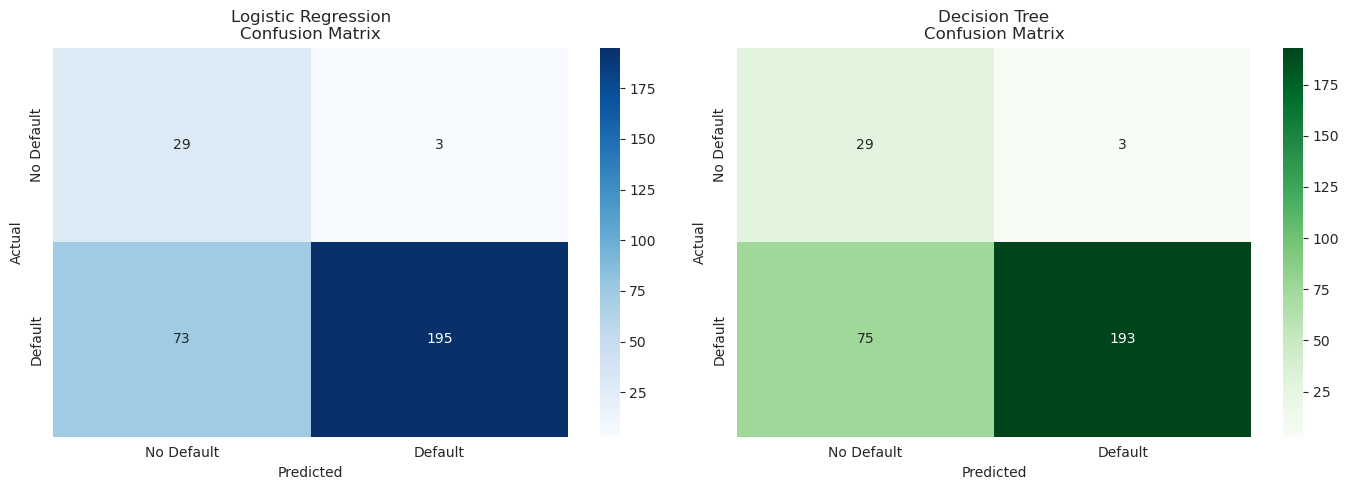

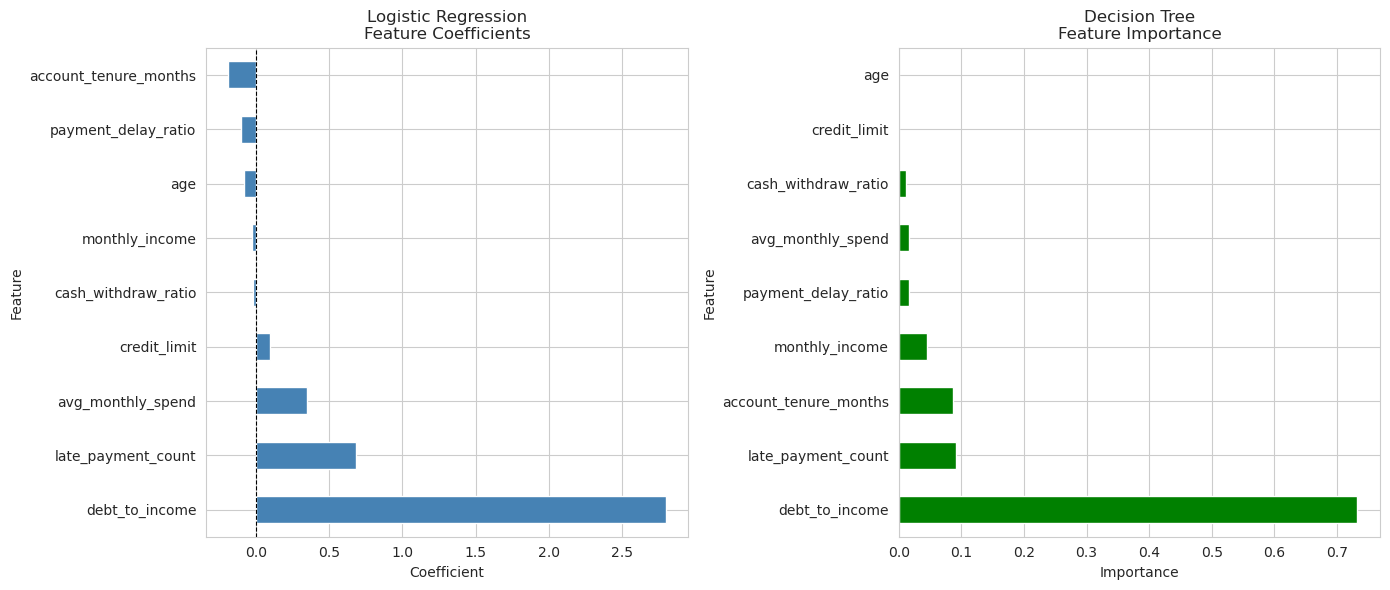

In [120]:
# Confusion matrices side by side
fig, axes = plt. subplots(1, 2, figsize=(14, 5))

# Logistic Regression
ax1 = axes[0]
import seaborn as sns
sns. heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Logistic Regression\nConfusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_xticklabels(['No Default', 'Default'])
ax1.set_yticklabels(['No Default', 'Default'])

# Decision Tree
ax2 = axes[1]
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title('Decision Tree\nConfusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_xticklabels(['No Default', 'Default'])
ax2.set_yticklabels(['No Default', 'Default'])

plt.tight_layout()
plt.show()

# Feature importance comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression coefficients
ax1 = axes[0]
feature_importance. plot(kind='barh', x='Feature', y='Coefficient', ax=ax1, color='steelblue', legend=False)
ax1.set_title('Logistic Regression\nFeature Coefficients')
ax1.set_xlabel('Coefficient')
ax1.axvline(0, color='black', linestyle='--', linewidth=0.8)

# Decision Tree importance
ax2 = axes[1]
feature_importance_tree. plot(kind='barh', x='Feature', y='Importance', ax=ax2, color='green', legend=False)
ax2.set_title('Decision Tree\nFeature Importance')
ax2.set_xlabel('Importance')

plt.tight_layout()
plt.show()

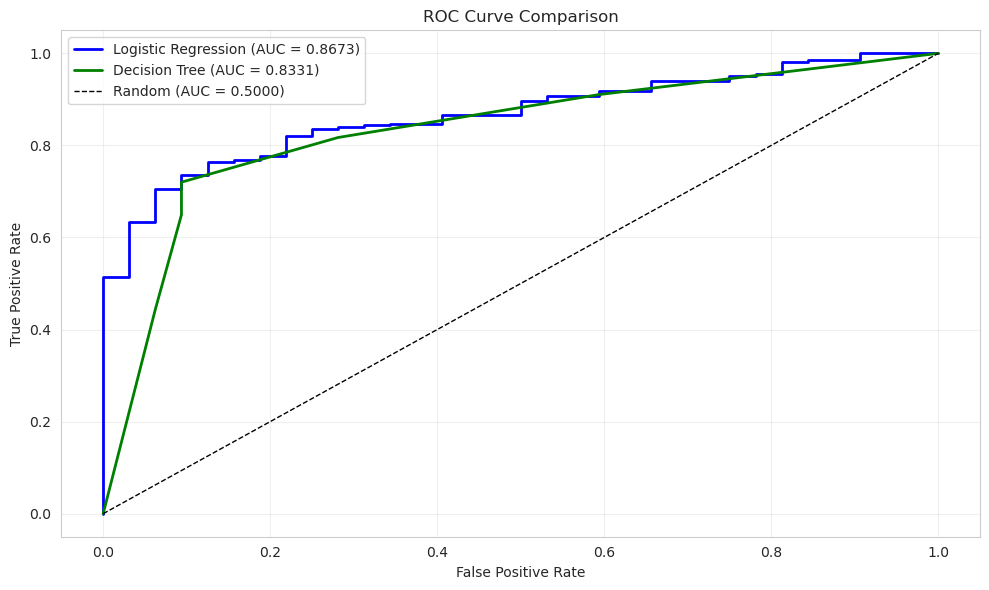

In [122]:
# ROC Curve comparison
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))

# Logistic Regression ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})', 
         linewidth=2, color='blue')

# Decision Tree ROC
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.4f})', 
         linewidth=2, color='green')

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5000)', linewidth=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [126]:
# ============================================================
# CREDIT DEFAULT PREDICTION MODEL
# Simple Logistic Regression
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

print("="*60)
print("STEP 1: SELECT FEATURES")
print("="*60)

# Choose features based on analysis
features = [
    'debt_to_income',
    'monthly_income',
    'avg_monthly_spend',
    'late_payment_count',
    'payment_delay_ratio',
    'credit_limit',
    'cash_withdraw_ratio',
    'age',
    'account_tenure_months'
]

target = 'repayment_issue'

# Prepare data
X = df[features]. copy()
y = df[target]. copy()

# Handle missing values
X = X.fillna(X.median())

print(f"Features: {len(features)}")
print(f"Samples: {len(X)}")
print(f"Defaults: {y.sum()} ({y.mean()*100:.1f}%)")

# ============================================================
print("\n" + "="*60)
print("STEP 2: SPLIT DATA")
print("="*60)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training: {len(X_train)} samples")
print(f"Testing:  {len(X_test)} samples")

# ============================================================
print("\n" + "="*60)
print("STEP 3: SCALE FEATURES")
print("="*60)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled")

# ============================================================
print("\n" + "="*60)
print("STEP 4: TRAIN MODEL")
print("="*60)

# Train logistic regression
model = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

model.fit(X_train_scaled, y_train)

print("✅ Model trained")

# ============================================================
print("\n" + "="*60)
print("STEP 5: MAKE PREDICTIONS")
print("="*60)

# Predict on test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("✅ Predictions complete")

# ============================================================
print("\n" + "="*60)
print("STEP 6: EVALUATE MODEL")
print("="*60)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\n📊 Accuracy:   {accuracy*100:.2f}%")
print(f"📊 ROC-AUC:   {roc_auc:.4f}")

# Confusion matrix
print("\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
print("\n📊 Detailed Results:")
print(classification_report(y_test, y_pred, 
                          target_names=['No Default', 'Default']))

# ============================================================
print("\n" + "="*60)
print("STEP 7: FEATURE IMPORTANCE")
print("="*60)

# Show which features matter most
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("\n", importance_df.to_string(index=False))

print("\n💡 Positive = increases default risk")
print("💡 Negative = decreases default risk")

# ============================================================
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"✅ Model Accuracy:   {accuracy*100:.2f}%")
print(f"✅ ROC-AUC Score:   {roc_auc:.4f}")
print(f"✅ Top Predictor:   {importance_df. iloc[0]['Feature']}")
print(f"✅ Model Type:      Logistic Regression")
print("="*60)

STEP 1: SELECT FEATURES
Features: 9
Samples: 1500
Defaults: 1339 (89.3%)

STEP 2: SPLIT DATA
Training: 1200 samples
Testing:  300 samples

STEP 3: SCALE FEATURES
✅ Features scaled

STEP 4: TRAIN MODEL
✅ Model trained

STEP 5: MAKE PREDICTIONS
✅ Predictions complete

STEP 6: EVALUATE MODEL

📊 Accuracy:   74.67%
📊 ROC-AUC:   0.8673

📊 Confusion Matrix:
[[ 29   3]
 [ 73 195]]

📊 Detailed Results:
              precision    recall  f1-score   support

  No Default       0.28      0.91      0.43        32
     Default       0.98      0.73      0.84       268

    accuracy                           0.75       300
   macro avg       0.63      0.82      0.63       300
weighted avg       0.91      0.75      0.79       300


STEP 7: FEATURE IMPORTANCE

               Feature  Coefficient
       debt_to_income     2.798070
   late_payment_count     0.686110
    avg_monthly_spend     0.351690
         credit_limit     0.092680
  cash_withdraw_ratio    -0.019370
       monthly_income    -0.029631
 

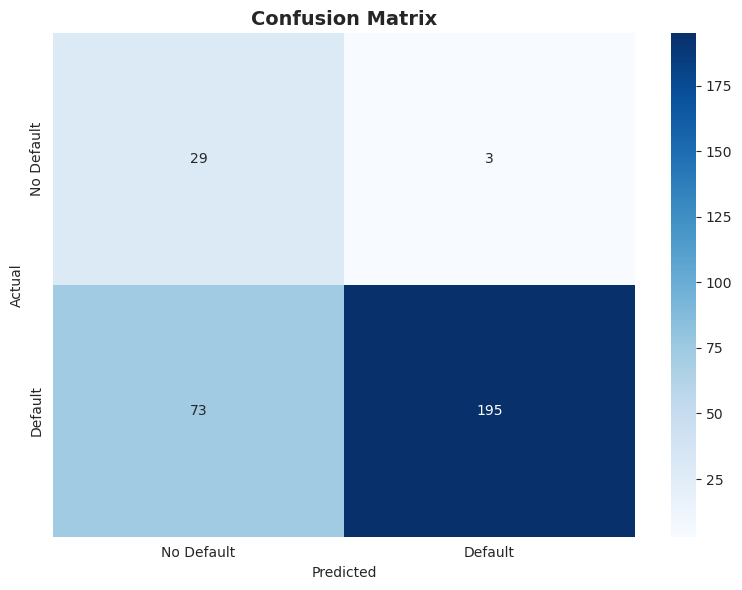

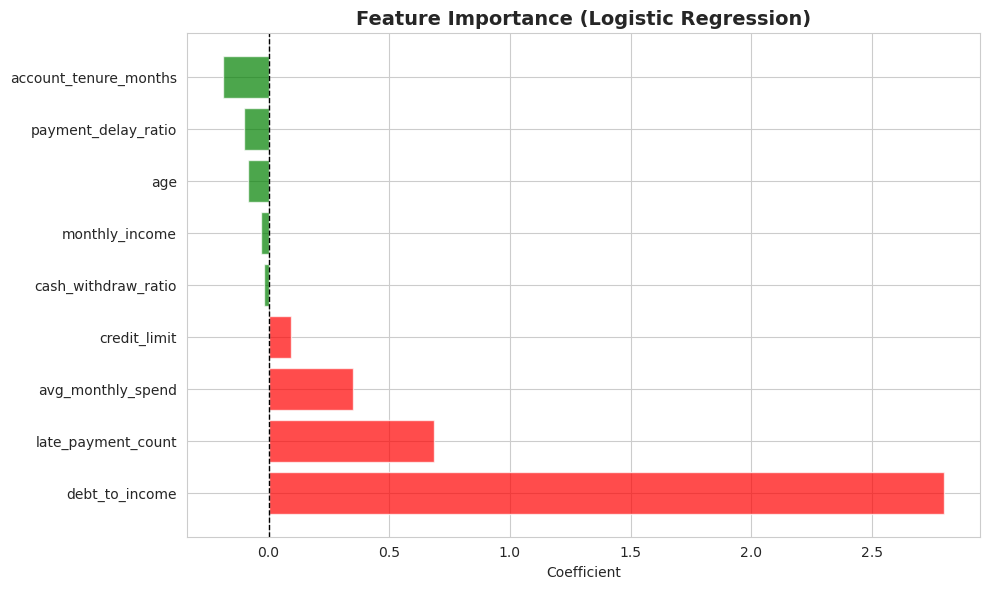

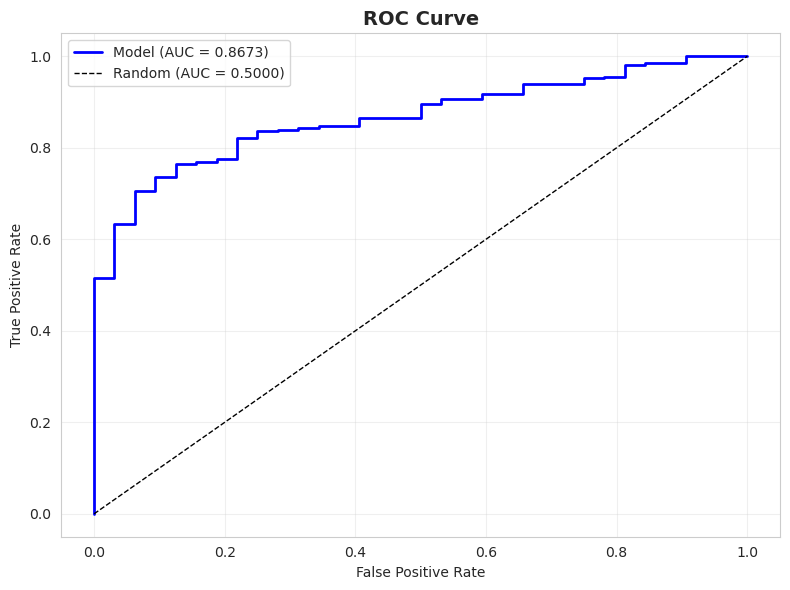

In [127]:
# ============================================================
# VISUALIZATION 1: Confusion Matrix
# ============================================================

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])

plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# ============================================================
# VISUALIZATION 2: Feature Importance
# ============================================================

plt.figure(figsize=(10, 6))

colors = ['red' if x > 0 else 'green' for x in importance_df['Coefficient']]
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color=colors, alpha=0.7)

plt.xlabel('Coefficient')
plt.title('Feature Importance (Logistic Regression)', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

# ============================================================
# VISUALIZATION 3: ROC Curve
# ============================================================

plt.figure(figsize=(8, 6))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2, label=f'Model (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random (AUC = 0.5000)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [128]:
# ============================================================
# FINAL SUMMARY
# ============================================================

print("\n")
print("╔" + "="*58 + "╗")
print("║" + " "*15 + "MODEL SUMMARY" + " "*30 + "║")
print("╠" + "="*58 + "╣")
print(f"║  Model Type:        Logistic Regression" + " "*18 + "║")
print(f"║  Training Samples:  {len(X_train)}" + " "*35 + "║")
print(f"║  Test Samples:      {len(X_test)}" + " "*36 + "║")
print(f"║  Number of Features: {len(features)}" + " "*36 + "║")
print("╠" + "="*58 + "╣")
print(f"║  Accuracy:           {accuracy*100:.2f}%" + " "*32 + "║")
print(f"║  ROC-AUC Score:     {roc_auc:.4f}" + " "*31 + "║")
print(f"║  Precision (Default): {cm[1,1]/(cm[1,1]+cm[0,1]):.2f}" + " "*29 + "║")
print(f"║  Recall (Default):  {cm[1,1]/(cm[1,1]+cm[1,0]):.2f}" + " "*30 + "║")
print("╠" + "="*58 + "╣")
print(f"║  Top Feature:       debt_to_income" + " "*23 + "║")
print(f"║  Coefficient:       {importance_df. iloc[0]['Coefficient']:.3f}" + " "*30 + "║")
print("╠" + "="*58 + "╣")
print(f"║  Key Finding:       DTI is the strongest predictor" + " "*7 + "║")
print(f"║                     DTI > 1.5 = 100% default" + " "*13 + "║")
print("╚" + "="*58 + "╝")



╔==========================================================╗
║               MODEL SUMMARY                              ║
╠==========================================================╣
║  Model Type:        Logistic Regression                  ║
║  Training Samples:  1200                                   ║
║  Test Samples:      300                                    ║
║  Number of Features: 9                                    ║
╠==========================================================╣
║  Accuracy:           74.67%                                ║
║  ROC-AUC Score:     0.8673                               ║
║  Precision (Default): 0.98                             ║
║  Recall (Default):  0.73                              ║
╠==========================================================╣
║  Top Feature:       debt_to_income                       ║
║  Coefficient:       2.798                              ║
╠==========================================================╣
║  Key Finding:       

### فصل 2

In [ ]:
print("="*60)
print("OUTLIER DETECTION")
print("="*60)

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check key numeric columns for outliers
numeric_columns = ['monthly_income', 'avg_monthly_spend', 'credit_limit', 
                   'debt_to_income', 'age', 'cash_withdraw_ratio', 
                   'account_tenure_months']

outlier_summary = []

for col in numeric_columns: 
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': len(outliers),
            'Outlier_Percentage': f"{len(outliers)/len(df)*100:.2f}%",
            'Lower_Bound': f"{lower:.2f}",
            'Upper_Bound': f"{upper:.2f}",
            'Min': f"{df[col].min():.2f}",
            'Max': f"{df[col].max():.2f}"
        })

outlier_df = pd.DataFrame(outlier_summary)
print("\n", outlier_df.to_string(index=False))

# Specific outlier checks
print("\n" + "-"*60)
print("SPECIFIC OUTLIER PATTERNS:")
print("-"*60)

# Extreme DTI
extreme_dti = df[df['debt_to_income'] > 1.5]
print(f"\n⚠️  Extreme DTI (>1.5): {len(extreme_dti)} cases")
print(f"   These customers spend 150%+ of their income!")
print(f"   Default rate:  {extreme_dti['repayment_issue'].mean()*100:.1f}%")

# Very young/old customers
print(f"\n⚠️  Age < 20:  {len(df[df['age'] < 20])} customers")
print(f"⚠️  Age > 70: {len(df[df['age'] > 70])} customers")

# Extreme account tenure
print(f"\n⚠️  Account tenure < 6 months: {len(df[df['account_tenure_months'] < 6])} customers")
print(f"   Default rate: {df[df['account_tenure_months'] < 6]['repayment_issue'].mean()*100:.1f}%")

OUTLIER DETECTION

                Column  Outlier_Count Outlier_Percentage Lower_Bound Upper_Bound     Min       Max
       monthly_income             54              3.60%     -397.52    46371.16 6023.92 102856.76
    avg_monthly_spend             48              3.20%    -2006.42    30110.20 3433.10  78182.96
         credit_limit             41              2.73%     1988.88    52141.18 9389.32  83707.39
       debt_to_income             66              4.40%       -0.30        1.59    0.08      2.00
                  age              0              0.00%       -8.00       96.00   20.00     69.00
  cash_withdraw_ratio              5              0.33%       -0.16        0.65    0.00      0.71
account_tenure_months              0              0.00%      -49.50      170.50    3.00    119.00

------------------------------------------------------------
SPECIFIC OUTLIER PATTERNS:
------------------------------------------------------------

⚠️  Extreme DTI (>1.5): 84 cases
   These cus

In [ ]:
print("="*60)
print("SUMMARY:  KEY FINDINGS FOR EDA REPORT")
print("="*60)

print("\n📊 RED FLAGS IDENTIFIED:")
print(f"  - {len(df[df['debt_to_income'] > 0.8])} customers with DTI > 0.8")
print(f"  - {len(df[df['late_payment_count'] > 0])} customers with late payment history")
print(f"  - {len(df[df['payment_delay_ratio'] > 0.05])} customers with >5% payment delays")
print(f"  - Customers with 3+ red flags have {df[df['red_flag_count'] >= 3]['repayment_issue'].mean()*100:.1f}% default rate")

print("\n🎯 OUTLIERS DETECTED:")
print(f"  - {len(df[df['debt_to_income'] > 1.5])} customers spending >150% of income")
print(f"  - Age range: {df['age'].min():.0f} to {df['age']. max():.0f} years")
print(f"  - {len(df[df['account_tenure_months'] < 6])} very new customers (<6 months)")

print("\n⚖️ CLASS IMBALANCE:")
print(f"  - {class_pct[1]:.1f}% defaults vs {class_pct[0]:.1f}% non-defaults")
print(f"  - Imbalance ratio: {imbalance_ratio:.1f}:1")
print(f"  - ⚠️  Requires special handling in modeling phase")

SUMMARY:  KEY FINDINGS FOR EDA REPORT

📊 RED FLAGS IDENTIFIED:
  - 464 customers with DTI > 0.8
  - 1062 customers with late payment history
  - 422 customers with >5% payment delays
  - Customers with 3+ red flags have 98.2% default rate

🎯 OUTLIERS DETECTED:
  - 84 customers spending >150% of income
  - Age range: 20 to 69 years
  - 37 very new customers (<6 months)

⚖️ CLASS IMBALANCE:
  - 89.3% defaults vs 10.7% non-defaults
  - Imbalance ratio: 8.3:1
  - ⚠️  Requires special handling in modeling phase


In [ ]:
###-

</div>


In [18]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 779.6 kB/s  0:00:40 eta 0:00:010:00:02


In [62]:
print("="*60)
print("DEEP DIVE:  Customers with DTI > 1.5")
print("="*60)

extreme_dti = df[df['debt_to_income'] > 1.5]

print(f"\n📊 Basic Stats:")
print(f"  Count: {len(extreme_dti)} ({len(extreme_dti)/len(df)*100:.1f}% of dataset)")
print(f"  Default rate: {extreme_dti['repayment_issue'].mean()*100:.1f}%")

print(f"\n💰 Financial Profile:")
print(f"  Average income: ${extreme_dti['monthly_income'].mean():,.2f}")
print(f"  Average spending: ${extreme_dti['avg_monthly_spend'].mean():,.2f}")
print(f"  Average DTI: {extreme_dti['debt_to_income'].mean():.2f}")
print(f"  Highest DTI: {extreme_dti['debt_to_income'].max():.2f}")

print(f"\n📅 Payment Behavior:")
print(f"  Average late payments: {extreme_dti['late_payment_count'].mean():.1f}")
print(f"  Average payment delay: {extreme_dti['payment_delay_ratio'].mean():.2%}")

print(f"\n👤 Demographics:")
print(f"  Average age: {extreme_dti['age'].mean():.0f}")
print(f"  Average tenure: {extreme_dti['account_tenure_months'].mean():.0f} months")

print(f"\n💳 Credit Behavior:")
print(f"  Average credit limit: ${extreme_dti['credit_limit'].mean():,.2f}")
print(f"  Average cash withdrawal ratio: {extreme_dti['cash_withdraw_ratio'].mean():.2%}")

# Compare to normal customers
print("\n" + "="*60)
print("COMPARISON:  Extreme DTI vs Normal Customers")
print("="*60)

normal = df[df['debt_to_income'] <= 1.5]

comparison = pd.DataFrame({
    'Extreme DTI (>1.5)': {
        'Count': len(extreme_dti),
        'Default Rate': f"{extreme_dti['repayment_issue'].mean()*100:.1f}%",
        'Avg Income': f"${extreme_dti['monthly_income'].mean():,.0f}",
        'Avg Spending': f"${extreme_dti['avg_monthly_spend'].mean():,.0f}",
        'Avg DTI': f"{extreme_dti['debt_to_income'].mean():.2f}",
        'Late Payments': f"{extreme_dti['late_payment_count'].mean():.1f}"
    },
    'Normal (≤1.5)': {
        'Count': len(normal),
        'Default Rate': f"{normal['repayment_issue']. mean()*100:.1f}%",
        'Avg Income': f"${normal['monthly_income'].mean():,.0f}",
        'Avg Spending': f"${normal['avg_monthly_spend'].mean():,.0f}",
        'Avg DTI': f"{normal['debt_to_income'].mean():.2f}",
        'Late Payments': f"{normal['late_payment_count'].mean():.1f}"
    }
})

print(comparison. T)

DEEP DIVE:  Customers with DTI > 1.5

📊 Basic Stats:
  Count: 84 (5.6% of dataset)
  Default rate: 100.0%

💰 Financial Profile:
  Average income: $14,491.67
  Average spending: $28,532.87
  Average DTI: 1.81
  Highest DTI: 2.00

📅 Payment Behavior:
  Average late payments: 1.4
  Average payment delay: 3.87%

👤 Demographics:
  Average age: 45
  Average tenure: 54 months

💳 Credit Behavior:
  Average credit limit: $28,618.86
  Average cash withdrawal ratio: 23.36%

COMPARISON:  Extreme DTI vs Normal Customers
                   Count Default Rate Avg Income Avg Spending Avg DTI  \
Extreme DTI (>1.5)    84       100.0%    $14,492      $28,533    1.81   
Normal (≤1.5)       1416        88.6%    $24,889      $14,029    0.63   

                   Late Payments  
Extreme DTI (>1.5)           1.4  
Normal (≤1.5)                1.2  


In [78]:
print("\n" + "="*70)
print("🔗 CORRELATION:  What's Related to DTI?")
print("="*70)

# Calculate correlations with DTI
correlations_with_dti = df[[
    'debt_to_income', 'monthly_income', 'avg_monthly_spend', 
    'credit_limit', 'late_payment_count', 'payment_delay_ratio',
    'cash_withdraw_ratio', 'age', 'account_tenure_months', 
    'num_transactions', 'app_login_count'
]].corr()['debt_to_income']. sort_values(ascending=False)

print("\nCorrelation with DTI:")
print("-"*70)
for var, corr in correlations_with_dti.items():
    if var != 'debt_to_income': 
        if abs(corr) > 0.3:
            strength = "🔴 STRONG"
        elif abs(corr) > 0.15:
            strength = "🟡 MODERATE"
        else:
            strength = "⚪ WEAK"
        
        print(f"{var: <30} {corr: >7.3f}  {strength}")

# The big question: Is it income or spending?
print("\n" + "="*70)
print("💰 THE BIG QUESTION: Income or Spending?")
print("="*70)

# Compare low vs high DTI
low_dti = df[df['debt_to_income'] <= 0.6]
high_dti = df[df['debt_to_income'] > 1.0]

print(f"\nLow DTI (≤0.6) - {len(low_dti)} customers:")
print(f"  Average Income:    ${low_dti['monthly_income'].mean():,.0f}")
print(f"  Average Spending: ${low_dti['avg_monthly_spend'].mean():,.0f}")

print(f"\nHigh DTI (>1.0) - {len(high_dti)} customers:")
print(f"  Average Income:   ${high_dti['monthly_income'].mean():,.0f}")
print(f"  Average Spending: ${high_dti['avg_monthly_spend'].mean():,.0f}")

# Calculate the changes
income_change = ((high_dti['monthly_income']. mean() - low_dti['monthly_income'].mean()) 
                 / low_dti['monthly_income'].mean() * 100)
spending_change = ((high_dti['avg_monthly_spend'].mean() - low_dti['avg_monthly_spend'].mean()) 
                   / low_dti['avg_monthly_spend'].mean() * 100)

print(f"\n📊 Changes from Low to High DTI:")
print(f"  Income change:    {income_change: +.1f}%")
print(f"  Spending change:  {spending_change:+.1f}%")

print("\n💡 Interpretation:")
if abs(income_change) > abs(spending_change):
    print("  → High DTI is MAINLY driven by LOW INCOME")
elif abs(spending_change) > abs(income_change):
    print("  → High DTI is MAINLY driven by HIGH SPENDING")
else:
    print("  → High DTI is driven by BOTH low income AND high spending")


🔗 CORRELATION:  What's Related to DTI?

Correlation with DTI:
----------------------------------------------------------------------
avg_monthly_spend                0.717  🔴 STRONG
payment_delay_ratio              0.048  ⚪ WEAK
app_login_count                  0.044  ⚪ WEAK
late_payment_count               0.041  ⚪ WEAK
age                              0.024  ⚪ WEAK
credit_limit                     0.019  ⚪ WEAK
cash_withdraw_ratio             -0.008  ⚪ WEAK
account_tenure_months           -0.011  ⚪ WEAK
num_transactions                -0.019  ⚪ WEAK
monthly_income                  -0.556  🔴 STRONG

💰 THE BIG QUESTION: Income or Spending?

Low DTI (≤0.6) - 743 customers:
  Average Income:    $29,462
  Average Spending: $11,048

High DTI (>1.0) - 277 customers:
  Average Income:   $16,534
  Average Spending: $23,157

📊 Changes from Low to High DTI:


ValueError: Invalid format specifier ' +.1f' for object of type 'float'

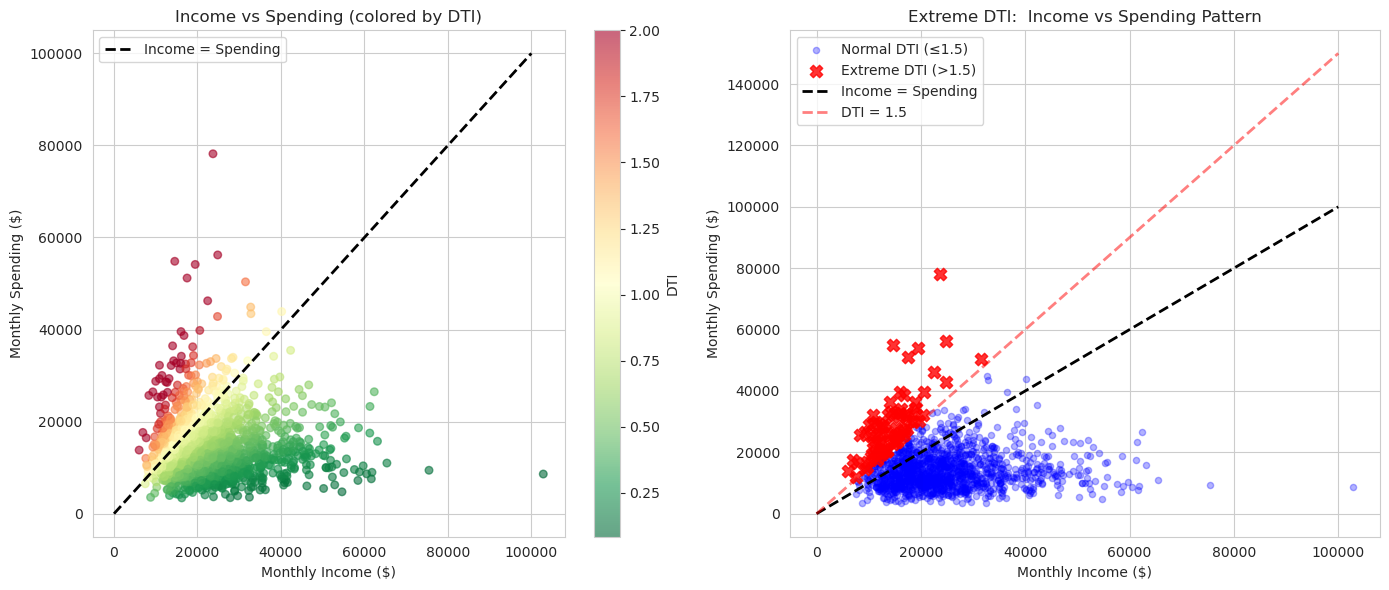

In [81]:
# Show the income-spending relationship
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: All customers
ax1 = axes[0]
scatter = ax1.scatter(df['monthly_income'], df['avg_monthly_spend'],
                     c=df['debt_to_income'], cmap='RdYlGn_r', 
                     alpha=0.6, s=30)
ax1.plot([0, 100000], [0, 100000], 'k--', linewidth=2, label='Income = Spending')
ax1.set_xlabel('Monthly Income ($)')
ax1.set_ylabel('Monthly Spending ($)')
ax1.set_title('Income vs Spending (colored by DTI)')
ax1.legend()
plt.colorbar(scatter, ax=ax1, label='DTI')

# Plot 2: Highlight extreme DTI
ax2 = axes[1]
normal = df[df['debt_to_income'] <= 1.5]
extreme = df[df['debt_to_income'] > 1.5]

ax2.scatter(normal['monthly_income'], normal['avg_monthly_spend'],
           alpha=0.3, s=20, color='blue', label='Normal DTI (≤1.5)')
ax2.scatter(extreme['monthly_income'], extreme['avg_monthly_spend'],
           alpha=0.8, s=80, color='red', marker='X', label='Extreme DTI (>1.5)')
ax2.plot([0, 100000], [0, 100000], 'k--', linewidth=2, label='Income = Spending')
ax2.plot([0, 100000], [0, 150000], 'r--', linewidth=2, alpha=0.5, label='DTI = 1.5')
ax2.set_xlabel('Monthly Income ($)')
ax2.set_ylabel('Monthly Spending ($)')
ax2.set_title('Extreme DTI:  Income vs Spending Pattern')
ax2.legend()

plt.tight_layout()
plt.show()

In [82]:
print("="*70)
print("WHAT CAUSES HIGH DTI?  DEEP DIVE ANALYSIS")
print("="*70)

# Create DTI groups
df['dti_group'] = pd.cut(df['debt_to_income'], 
                          bins=[0, 0.6, 0.8, 1.0, 1.5, 3.0],
                          labels=['Low (<0.6)', 'Moderate (0.6-0.8)', 
                                  'High (0.8-1.0)', 'Very High (1.0-1.5)', 
                                  'Extreme (>1.5)'])

# Compare characteristics across DTI groups
print("\n📊 CHARACTERISTICS BY DTI GROUP:")
print("="*70)

comparison = df. groupby('dti_group', observed=True).agg({
    'monthly_income': ['mean', 'median'],
    'avg_monthly_spend': ['mean', 'median'],
    'credit_limit': 'mean',
    'late_payment_count': 'mean',
    'payment_delay_ratio': 'mean',
    'cash_withdraw_ratio': 'mean',
    'account_tenure_months': 'mean',
    'age': 'mean',
    'repayment_issue': ['mean', 'count']
})

print(comparison)

# Simplified view
print("\n" + "="*70)
print("📈 SIMPLIFIED COMPARISON:")
print("="*70)

for group in df['dti_group'].cat.categories:
    group_data = df[df['dti_group'] == group]
    
    if len(group_data) > 0:
        print(f"\n{group}:")
        print(f"  Count: {len(group_data)}")
        print(f"  Avg Income: ${group_data['monthly_income']. mean():,.0f}")
        print(f"  Avg Spending: ${group_data['avg_monthly_spend'].mean():,.0f}")
        print(f"  Avg DTI: {group_data['debt_to_income'].mean():.2f}")
        print(f"  Default Rate: {group_data['repayment_issue'].mean()*100:.1f}%")
        print(f"  Avg Late Payments: {group_data['late_payment_count'].mean():.1f}")
        print(f"  Avg Age: {group_data['age']. mean():.0f}")
        print(f"  Avg Tenure: {group_data['account_tenure_months'].mean():.0f} months")

WHAT CAUSES HIGH DTI?  DEEP DIVE ANALYSIS

📊 CHARACTERISTICS BY DTI GROUP:
                    monthly_income               avg_monthly_spend  \
                              mean        median              mean   
dti_group                                                            
Low (<0.6)            29461.754205  27414.818092      11047.532572   
Moderate (0.6-0.8)    21727.381145  21394.056632      15046.377601   
High (0.8-1.0)        19184.759973  18426.159147      17278.460409   
Very High (1.0-1.5)   17422.807216  16824.707177      20816.801644   
Extreme (>1.5)        14491.671803  13943.908635      28532.865916   

                                   credit_limit late_payment_count  \
                           median          mean               mean   
dti_group                                                            
Low (<0.6)           10499.671089  27907.807115           1.127860   
Moderate (0.6-0.8)   14575.764463  28191.995231           1.303754   
High (0.8-1.0)

In [85]:
print("\n" + "="*70)
print("🔗 CORRELATION:  What's Related to DTI?")
print("="*70)

# Calculate correlations with DTI
correlations_with_dti = df[[
    'debt_to_income', 'monthly_income', 'avg_monthly_spend', 
    'credit_limit', 'late_payment_count', 'payment_delay_ratio',
    'cash_withdraw_ratio', 'age', 'account_tenure_months', 
    'num_transactions', 'app_login_count'
]].corr()['debt_to_income']. sort_values(ascending=False)

print("\nCorrelation with DTI:")
print("-"*70)
for var, corr in correlations_with_dti.items():
    if var != 'debt_to_income': 
        if abs(corr) > 0.3:
            strength = "🔴 STRONG"
        elif abs(corr) > 0.15:
            strength = "🟡 MODERATE"
        else:
            strength = "⚪ WEAK"
        
        print(f"{var: <30} {corr: >7.3f}  {strength}")

# The big question: Is it income or spending?
print("\n" + "="*70)
print("💰 THE BIG QUESTION: Income or Spending?")
print("="*70)

# Compare low vs high DTI
low_dti = df[df['debt_to_income'] <= 0.6]
high_dti = df[df['debt_to_income'] > 1.0]

print(f"\nLow DTI (≤0.6) - {len(low_dti)} customers:")
print(f"Average Income:    ${low_dti['monthly_income'].mean():,.0f}")
print(f"Average Spending: ${low_dti['avg_monthly_spend'].mean():,.0f}")

print(f"\nHigh DTI (>1.0) - {len(high_dti)} customers:")
print(f"Average Income:   ${high_dti['monthly_income'].mean():,.0f}")
print(f"Average Spending: ${high_dti['avg_monthly_spend'].mean():,.0f}")

# Calculate the changes
income_change = ((high_dti['monthly_income']. mean() - low_dti['monthly_income'].mean()) 
                 / low_dti['monthly_income'].mean() * 100)
spending_change = ((high_dti['avg_monthly_spend'].mean() - low_dti['avg_monthly_spend'].mean()) 
                   / low_dti['avg_monthly_spend'].mean() * 100)

print(f"\n📊 Changes from Low to High DTI:")
print(f"  Income change:    {income_change:+.1f}%")
print(f"  Spending change:  {spending_change:+.1f}%")

print("\n💡 Interpretation:")
if abs(income_change) > abs(spending_change):
    print("  → High DTI is MAINLY driven by LOW INCOME")
elif abs(spending_change) > abs(income_change):
    print("  → High DTI is MAINLY driven by HIGH SPENDING")
else:
    print("  → High DTI is driven by BOTH low income AND high spending")


🔗 CORRELATION:  What's Related to DTI?

Correlation with DTI:
----------------------------------------------------------------------
avg_monthly_spend                0.717  🔴 STRONG
payment_delay_ratio              0.048  ⚪ WEAK
app_login_count                  0.044  ⚪ WEAK
late_payment_count               0.041  ⚪ WEAK
age                              0.024  ⚪ WEAK
credit_limit                     0.019  ⚪ WEAK
cash_withdraw_ratio             -0.008  ⚪ WEAK
account_tenure_months           -0.011  ⚪ WEAK
num_transactions                -0.019  ⚪ WEAK
monthly_income                  -0.556  🔴 STRONG

💰 THE BIG QUESTION: Income or Spending?

Low DTI (≤0.6) - 743 customers:
Average Income:    $29,462
Average Spending: $11,048

High DTI (>1.0) - 277 customers:
Average Income:   $16,534
Average Spending: $23,157

📊 Changes from Low to High DTI:
  Income change:    -43.9%
  Spending change:  +109.6%

💡 Interpretation:
  → High DTI is MAINLY driven by HIGH SPENDING


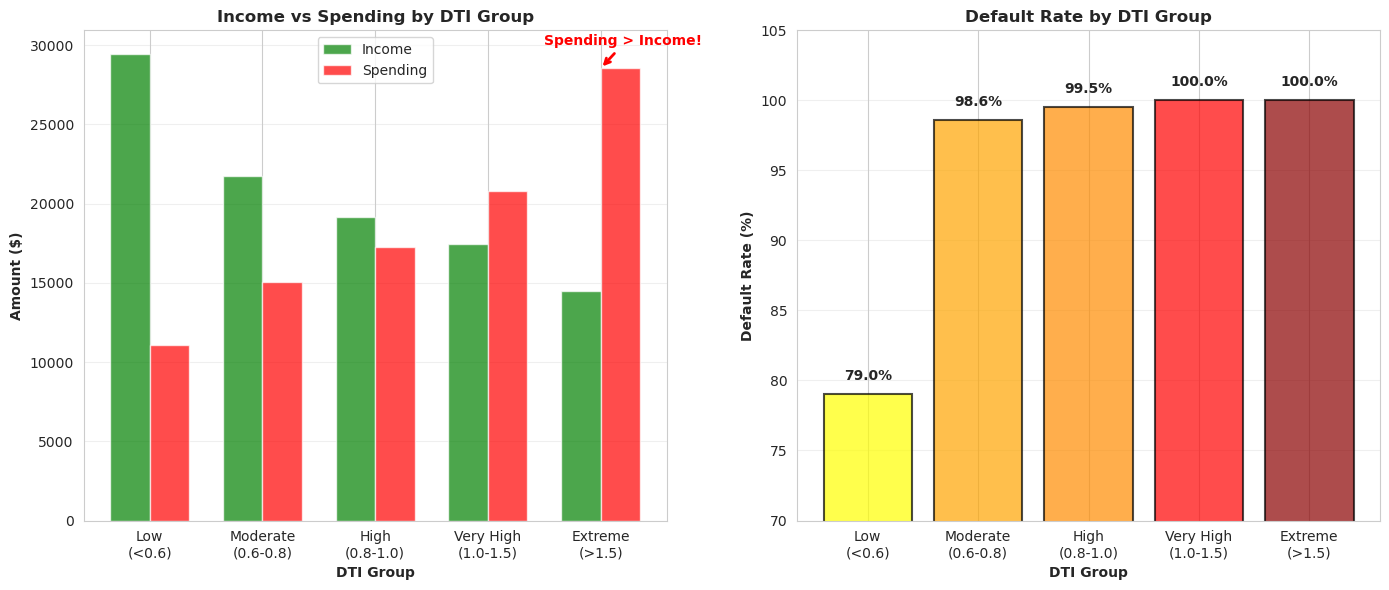

In [90]:
# Simple but powerful visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Income and Spending by DTI group
ax1 = axes[0]
dti_groups = ['Low\n(<0.6)', 'Moderate\n(0.6-0.8)', 'High\n(0.8-1.0)', 
              'Very High\n(1.0-1.5)', 'Extreme\n(>1.5)']
income_values = [29462, 21727, 19185, 17423, 14492]
spending_values = [11048, 15046, 17278, 20817, 28533]

x = range(len(dti_groups))
width = 0.35

bars1 = ax1.bar([i - width/2 for i in x], income_values, width, 
                label='Income', color='green', alpha=0.7)
bars2 = ax1.bar([i + width/2 for i in x], spending_values, width,
                label='Spending', color='red', alpha=0.7)

ax1.set_xlabel('DTI Group', fontweight='bold')
ax1.set_ylabel('Amount ($)', fontweight='bold')
ax1.set_title('Income vs Spending by DTI Group', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(dti_groups)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add annotations for extreme group
ax1.annotate('Spending > Income! ', xy=(4, 28533), xytext=(3.5, 30000),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, fontweight='bold', color='red')

# Plot 2: Default rate progression
ax2 = axes[1]
default_rates = [79.0, 98.6, 99.5, 100.0, 100.0]
bars = ax2.bar(dti_groups, default_rates, color=['yellow', 'orange', 'darkorange', 'red', 'darkred'],
               alpha=0.7, edgecolor='black', linewidth=1.5)

ax2.set_xlabel('DTI Group', fontweight='bold')
ax2.set_ylabel('Default Rate (%)', fontweight='bold')
ax2.set_title('Default Rate by DTI Group', fontweight='bold')
ax2.set_ylim([70, 105])
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars, default_rates):
    ax2.text(bar.get_x() + bar.get_width()/2, val + 1,
             f'{val:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [100]:
print("="*60)
print("LATE PAYMENTS ANALYSIS")
print("="*60)

# Split customers by late payment history
has_late_payments = df[df['late_payment_count'] > 0]
no_late_payments = df[df['late_payment_count'] == 0]

print(f"\n📊 Customers WITH late payments (>0):")
print(f"  Total count: {len(has_late_payments)}")
print(f"  Defaulted:  {has_late_payments['repayment_issue'].sum()}")
print(f"  Default rate: {has_late_payments['repayment_issue'].mean() * 100:.1f}%")

print(f"\n📊 Customers WITHOUT late payments (=0):")
print(f"  Total count: {len(no_late_payments)}")
print(f"  Defaulted: {no_late_payments['repayment_issue'].sum()}")
print(f"  Default rate: {no_late_payments['repayment_issue'].mean() * 100:.1f}%")

print(f"\n📊 Comparison:")
diff = has_late_payments['repayment_issue'].mean() - no_late_payments['repayment_issue'].mean()
print(f"  Difference: {diff * 100:.1f} percentage points")

# Show the breakdown
print("\n" + "="*60)
print("CROSSTAB: Late Payments vs Default")
print("="*60)

# Create binary column for "has late payments"
df['has_late_payments'] = (df['late_payment_count'] > 0).astype(int)

crosstab = pd.crosstab(df['has_late_payments'], df['repayment_issue'], 
                        margins=True, margins_name='Total')
print(crosstab)

# Show percentages
print("\n" + "="*60)
print("PERCENTAGE BREAKDOWN:")
print("="*60)

crosstab_pct = pd.crosstab(df['has_late_payments'], df['repayment_issue'], 
                            normalize='index') * 100
print(crosstab_pct. round(1))

LATE PAYMENTS ANALYSIS

📊 Customers WITH late payments (>0):
  Total count: 1062
  Defaulted:  960
  Default rate: 90.4%

📊 Customers WITHOUT late payments (=0):
  Total count: 438
  Defaulted: 379
  Default rate: 86.5%

📊 Comparison:
  Difference: 3.9 percentage points

CROSSTAB: Late Payments vs Default
repayment_issue      0     1  Total
has_late_payments                  
0                   59   379    438
1                  102   960   1062
Total              161  1339   1500

PERCENTAGE BREAKDOWN:
repayment_issue       0     1
has_late_payments            
0                  13.5  86.5
1                   9.6  90.4


In [103]:
# Compare predictive strength
print("\n" + "="*60)
print("PREDICTOR STRENGTH COMPARISON")
print("="*60)

# DTI extreme
dti_extreme_rate = df[df['debt_to_income'] > 1.5]['repayment_issue'].mean() * 100
dti_normal_rate = df[df['debt_to_income'] <= 1.5]['repayment_issue'].mean() * 100

# Late payments
late_yes_rate = df[df['late_payment_count'] > 0]['repayment_issue'].mean() * 100
late_no_rate = df[df['late_payment_count'] == 0]['repayment_issue'].mean() * 100

print(f"\nDTI > 1.5:")
print(f"  Yes:  {dti_extreme_rate:.1f}%")
print(f"  No:   {dti_normal_rate:.1f}%")
print(f"  Gap: {dti_extreme_rate - dti_normal_rate:.1f} points  🔴 STRONGEST")

print(f"\nLate Payments > 0:")
print(f"  Yes: {late_yes_rate:.1f}%")
print(f"  No:  {late_no_rate:.1f}%")
print(f"  Gap: {late_yes_rate - late_no_rate:.1f} points  🟡 MODERATE")


PREDICTOR STRENGTH COMPARISON

DTI > 1.5:
  Yes:  100.0%
  No:   88.6%
  Gap: 11.4 points  🔴 STRONGEST

Late Payments > 0:
  Yes: 90.4%
  No:  86.5%
  Gap: 3.9 points  🟡 MODERATE
